<a href="https://colab.research.google.com/github/obeabi/Automobile_Data_Set/blob/main/Auto_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Date: 2020-11-21
### Project Name : Automobile Dataest

#### Project Objective: Predict Car Price from 25 given attributes
##### Project Type : Regression

## Step 1: Data Uploading and Cleaning: Data Preprocessing

In [1]:
# import libraries
!pip install category-encoders
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")

     |████████████████████████████████| 81kB 5.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Installtion completed successfully!


In [2]:
# Import dataset and peruse first 10 rows
data = pd.read_csv('imports-85.data',header = None,  sep = ',')
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Include column names

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base','length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg','price']

print("The number of columns in my input column_names:" , len(column_names))

The number of columns in my input column_names: 26


In [4]:
# Join column names to dataframe
data.columns = column_names

data.to_csv('x123.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Check the shape of the dataframe and inspect for missing values

print( data.shape)
print("The number of rows in the dataframe", data.shape[0])
print("The number of columns in the dataframe", data.shape[1])

data.replace('?',np.NAN, inplace= True)


missing_values = data.isnull().sum().sum()

print("The total number of missing values" ,missing_values)


(205, 26)
The number of rows in the dataframe 205
The number of columns in the dataframe 26
The total number of missing values 59


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# Check data types in order to correct if necessary
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Convert price column data to float type
data["price"].astype('float')

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [9]:
# Check for missing values in the price  column
data['price'].isnull().sum()

data.dropna(subset=['price'], axis = 0, inplace= True)

print("Misising values in price column in new dataframe is:", data['price'].isnull().sum())
data.reset_index(drop = True)


Misising values in price column in new dataframe is: 0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [10]:
# lET US CHECK PERCENTAGE OF DATA THAT HAVE MISSING VALUES
no_rows = data.shape[0]
no_cols = data.shape[1]
no_records = np.multiply(no_rows, no_cols)
print("The number of records is: ", no_records)
print("The number of missing values is :",missing_values)
number_records = np.multiply(data.shape[0], data.shape[1])

#percentMissing = (missing_values/number_records)*100
percentMissing = (missing_values/ np.product(data.shape))*100
print("The perecentage of missing values is:", percentMissing)


The number of records is:  5226
The number of missing values is : 59
The perecentage of missing values is: 1.1289705319556067


### Handling Missing Values

In [11]:
# Method 1 : Drop all missing values
df1 = data.copy()

# this drops rows with missing values
df_row_drop= df1.dropna(axis = 0)

# Print shape of dataframe
print(df1.shape)
print(df_row_drop.shape)



(201, 26)
(159, 26)


In [12]:

# this drops columns with missing values
df_col_drop= df1.dropna(axis = 1)

# Print shape of dataframe
print(df1.shape)
print(df_col_drop.shape)
print(df_col_drop.columns)

(201, 26)
(201, 20)
Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [13]:
# Method 2: Imputation

df2 = data.copy()

df2.isnull().sum()


symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [14]:
# Ensure proper dataypes
df2[['bore','stroke', 'horsepower','peak-rpm']] = df2[['bore','stroke','horsepower','peak-rpm']].astype('float')
#df2[['bore','stroke']] = df2[['bore','stroke']].astype('float')
#df2['horsepower'] = df2['horsepower'].astype(int, copy = True)
#df2['peak-rpm'] = df2['peak-rpm'].astype(int,copy = True)
df2['normalized-losses'] = df2['normalized-losses'].astype('float')
df2['price'] = df2['price'].astype('int')
df2.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [15]:
# Get numerical columns and categorical columns from dataframe
num_cols = df2.select_dtypes(include = ['float','int']).columns
category_cols = [col  for col in df2.columns if df2[col].dtype == "object"]
category_cols

print(category_cols)
print('-'*50)
print(num_cols)


['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
--------------------------------------------------
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [16]:
# Handle/fill the missing values in the  numerical columns
for col in num_cols:
    df2[col].fillna(df2[col].mean(), inplace = True)


df2[num_cols].isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
# Handle/fill the missing values in the  categorical columns

for col in category_cols:
    df2[col].fillna(df2[col].mode()[0], inplace = True)

df2[category_cols].isnull().sum()

# Confirm total missing values in dataframe
print("The total missing vaues in new dataframe is :" , df2.isnull().sum().sum())

The total missing vaues in new dataframe is : 0


In [18]:
# Craeate category for horsepwer 
bins = np.linspace(min(df2["horsepower"]), max(df2["horsepower"]),4)



group_names = ['Low', 'Medium', 'High']

df2['horsepower-binned'] = pd.cut(df2['horsepower'], bins, labels = group_names, include_lowest= True)

df2[['horsepower-binned', 'horsepower']].head()

,horsepower-binned,horsepower
0,Low,111.0
1,Low,111.0
2,Medium,154.0
3,Low,102.0
4,Low,115.0


In [19]:
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


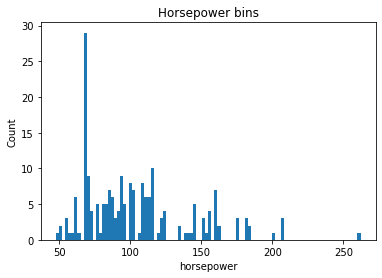

In [20]:
# Plot histogram for horsepower

plt.hist(df2['horsepower'], bins = 100)

plt.xlabel('horsepower')
plt.ylabel('Count')
plt.title('Horsepower bins')
plt.show()

In [21]:
for col in df2[num_cols].columns:
    print(col)
    print("skewness:", df2[col].skew())
    print("kurtosis:", df2[col].kurtosis())
    print('-'*35)

symboling
skewness: 0.19737036029756264
kurtosis: -0.7071776171630866
-----------------------------------
normalized-losses
skewness: 0.8465463512727495
kurtosis: 1.319067556644609
-----------------------------------
wheel-base
skewness: 1.0312614426719533
kurtosis: 0.948445096054463
-----------------------------------
length
skewness: 0.15444635183586677
kurtosis: -0.06519162777008303
-----------------------------------
width
skewness: 0.8750290419412816
kurtosis: 0.6786551692228984
-----------------------------------
height
skewness: 0.029173299149270183
kurtosis: -0.4329081504305292
-----------------------------------
curb-weight
skewness: 0.7058035875297635
kurtosis: 0.034915576048686336
-----------------------------------
engine-size
skewness: 1.9791441966363523
kurtosis: 5.497490766643349
-----------------------------------
bore
skewness: -0.032946155593633106
kurtosis: -0.7981824583683212
-----------------------------------
stroke
skewness: -0.7006789884680729
kurtosis: 2.130131

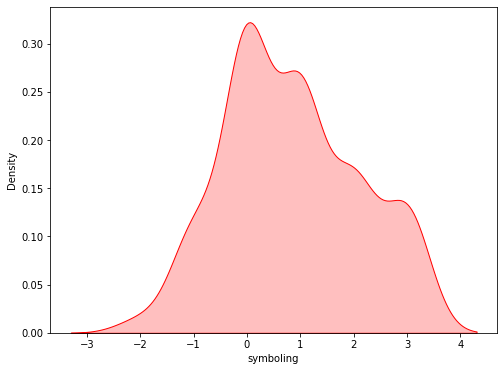

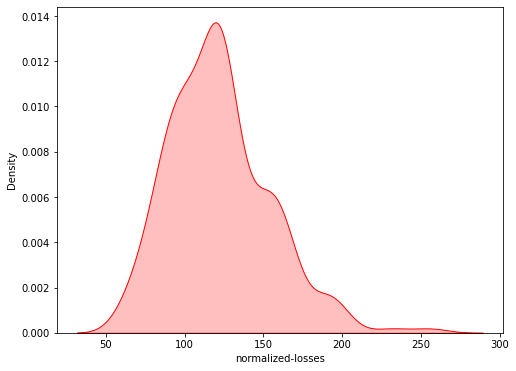

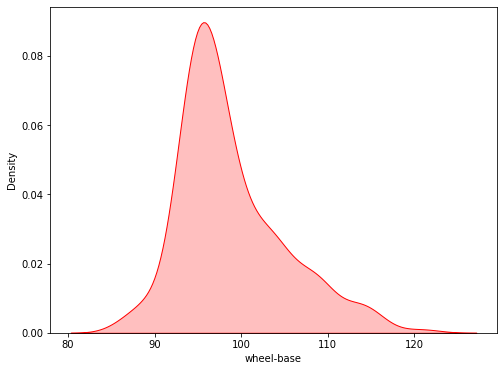

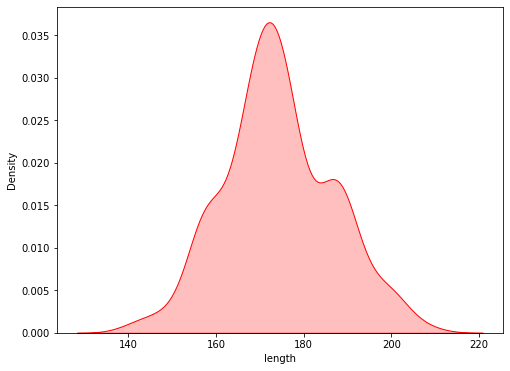

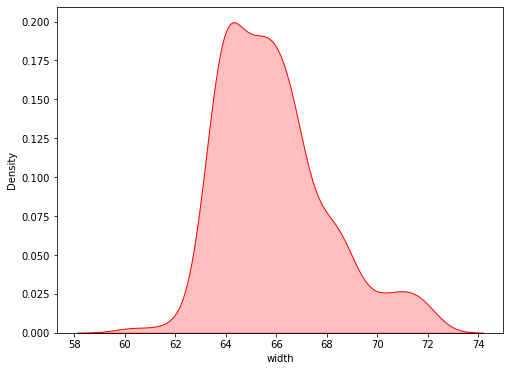

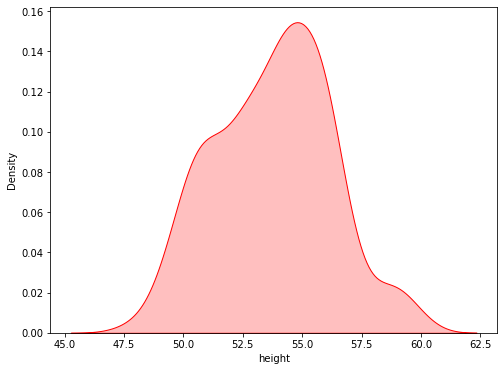

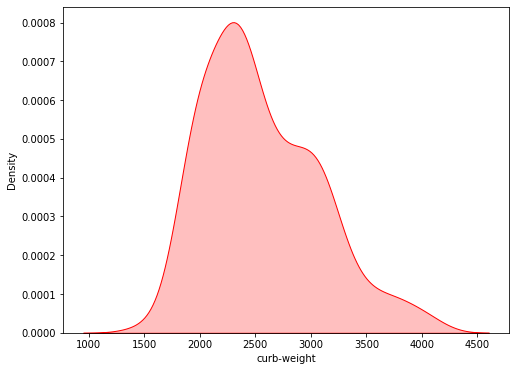

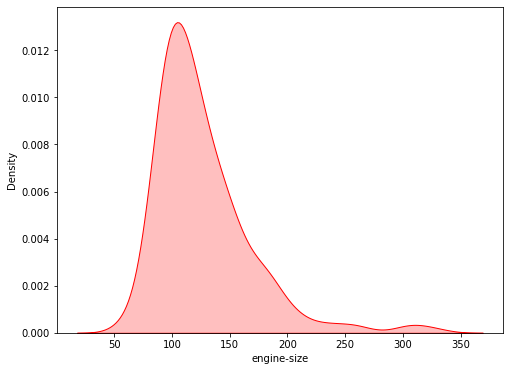

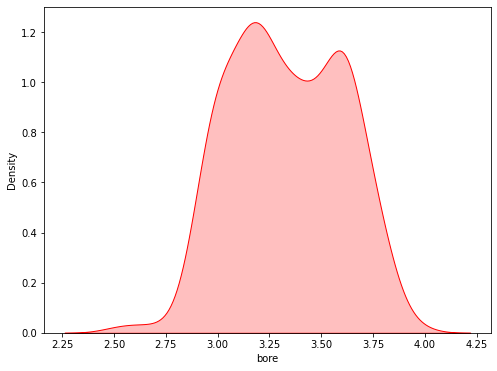

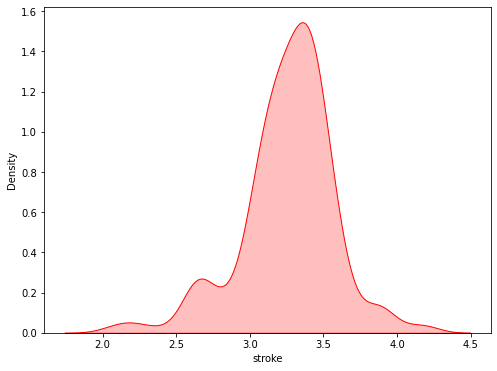

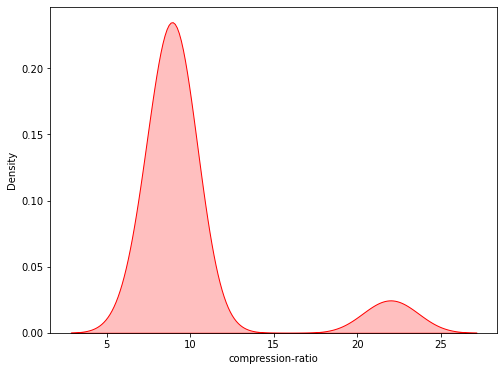

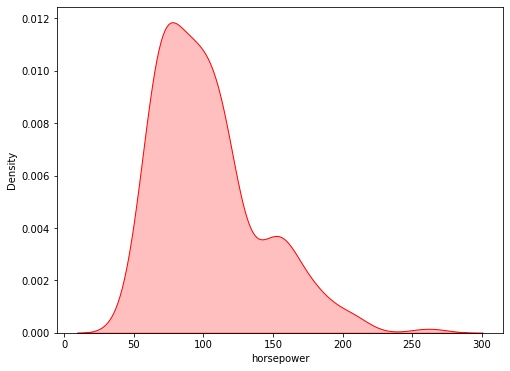

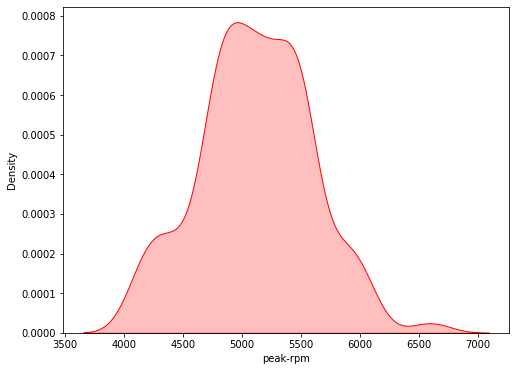

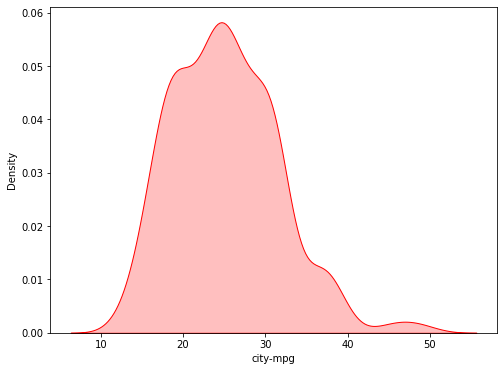

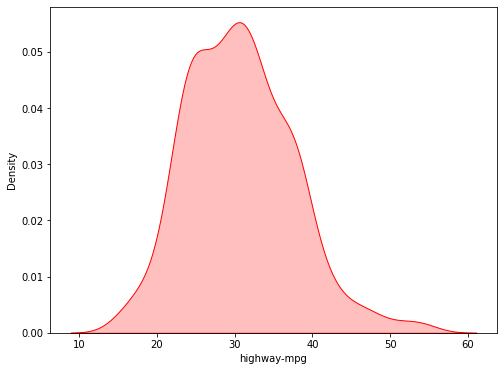

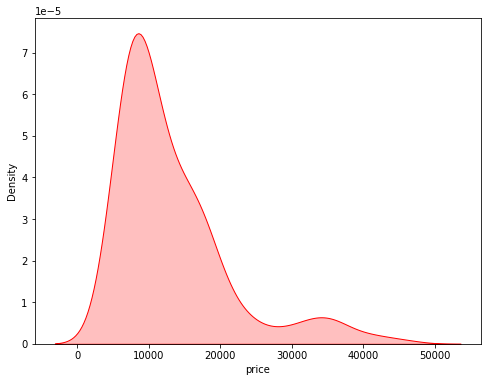

In [22]:
for col in df2[num_cols].columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(df2[col], shade=True, color="r")
    plt.show()


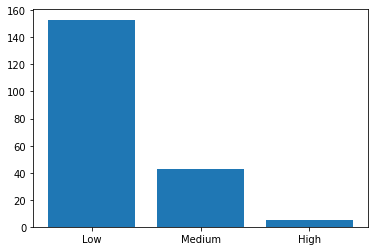

In [23]:
# plot barchart for horsepower-binned column
plt.bar(group_names, df2['horsepower-binned'].value_counts())
plt.show()




In [24]:
# Print dataframe
df2.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


## Step 2: EDA

In [25]:
# Summarize basic statistics of the dataframe
df2.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


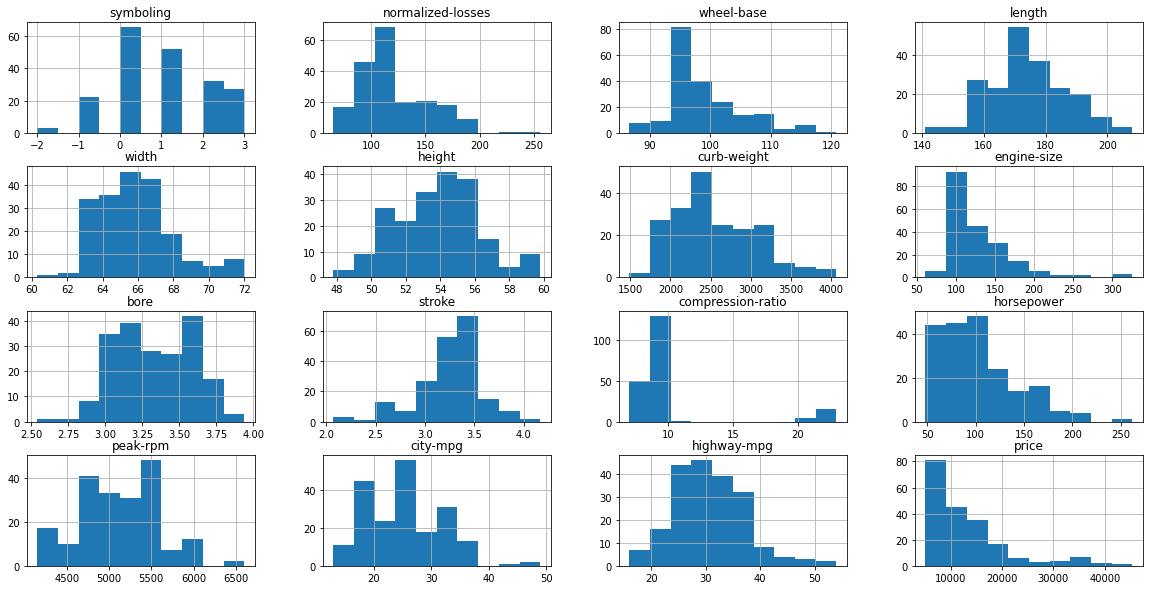

In [26]:
# Visualize histogram of dataset
df2.hist(figsize= (20,10), bins= 10)
plt.show()

In [27]:
# Explore vechile by drive-wheels

drive_wheels_counts = df2['drive-wheels'].value_counts().to_frame()
#drive_wheels_counts = df2['drive-wheels'].value_counts()

drive_wheels_counts.rename(columns= {"drive-wheels":'Value-counts'}, inplace= True)

drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts


,Value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


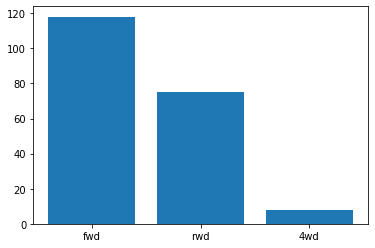

In [28]:
# plot barchart for vechile drive-wheels
group_names = [ 'fwd', 'rwd', '4wd']
plt.bar(group_names, df2['drive-wheels'].value_counts())
plt.show()

In [29]:
# Explore vechile by engine-type

engine_type_counts = df2['engine-type'].value_counts().to_frame()

engine_type_counts.rename(columns= {"engine-type":'Value-counts'}, inplace= True)

engine_type_counts.index.name = 'engine-type'

engine_type_counts

,Value-counts
engine-type,
ohc,145
ohcf,15
ohcv,13
l,12
dohc,12
rotor,4


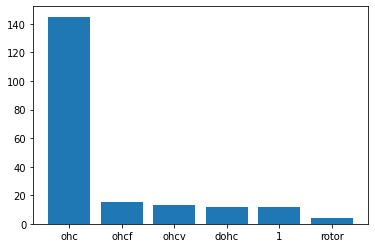

In [30]:
# plot barchart for vechile engine-types
group_names = [ 'ohc', 'ohcf', 'ohcv', 'dohc', '1','rotor']
plt.bar(group_names, df2['engine-type'].value_counts())
plt.show()

In [31]:
# Explore vechile by number of cylinders

num_cylinders_counts = df2['num-of-cylinders'].value_counts().to_frame()

num_cylinders_counts.index.name = 'cylinders'

num_cylinders_counts

,num-of-cylinders
cylinders,
four,157
six,24
five,10
eight,4
two,4
twelve,1
three,1


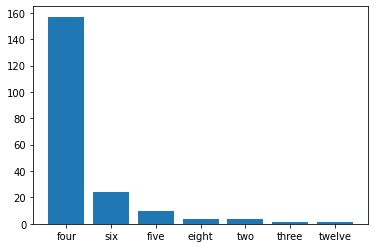

In [32]:
# plot barchart for vechile number of cylinders
group_names = [ 'four', 'six', 'five', 'eight', 'two','three', 'twelve']
plt.bar(group_names, df2['num-of-cylinders'].value_counts())
plt.show()

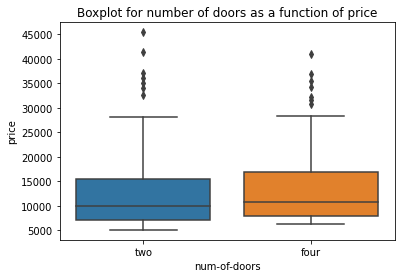

In [33]:
# Boxplot for number of doors

sns.boxplot(x = "num-of-doors", y = 'price', data = df2)
plt.title("Boxplot for number of doors as a function of price")
plt.show()

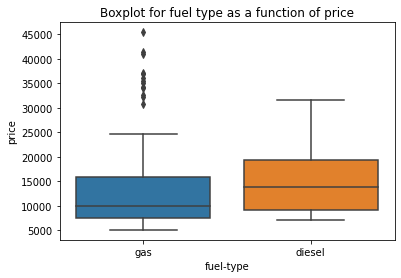

In [34]:
# Boxplot for fuel type

sns.boxplot(x = "fuel-type", y = 'price', data = df2)
plt.title("Boxplot for fuel type as a function of price")
plt.show()

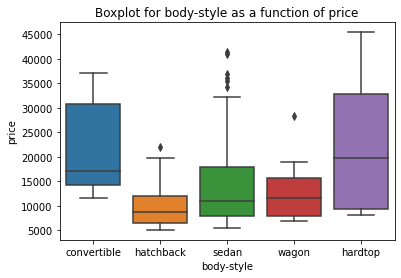

In [35]:
# Boxplot for body-style

sns.boxplot(x = "body-style", y = 'price', data = df2)
plt.title("Boxplot for body-style as a function of price")
plt.show()

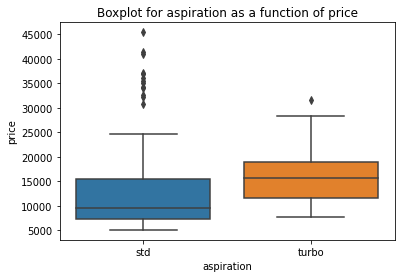

In [36]:
# Boxplot for aspiration

sns.boxplot(x = "aspiration", y = 'price', data = df2)
plt.title("Boxplot for aspiration as a function of price")
plt.show()

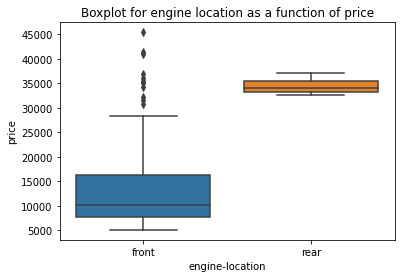

In [37]:
# Boxplot for engine location

sns.boxplot(x = "engine-location", y = 'price', data = df2)
plt.title("Boxplot for engine location as a function of price")
plt.show()

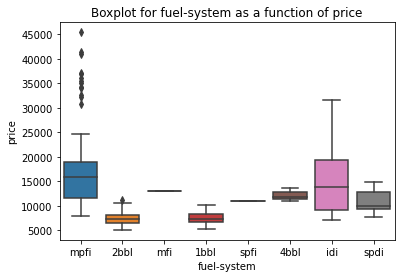

In [38]:
# Boxplot for fuel system

sns.boxplot(x = "fuel-system", y = 'price', data = df2)
plt.title("Boxplot for fuel-system as a function of price")
plt.show()

In [39]:
# Average price of vechiles by drive-wheels

df_test= df2.groupby(['drive-wheels'], as_index= False)['price'].mean()
df_test.sort_values(by = ['price'])

,drive-wheels,price
1,fwd,9244.779661
0,4wd,10241.000000
2,rwd,19757.613333


In [40]:
# Average price of vechiles by drive-wheels and aspiration
#df_test = df2[['drive-wheels', 'aspiration', 'price']]
df_test= df2.groupby(['drive-wheels','aspiration'], as_index= False)['price'].median()
df_test.sort_values(by = ['price'])

,drive-wheels,aspiration,price
2,fwd,std,7896.5
0,4wd,std,8395.5
1,4wd,turbo,11476.5
3,fwd,turbo,11663.5
4,rwd,std,16515.0
5,rwd,turbo,18685.0


In [41]:
# Check for correlation between variables
df2.corr(method = 'spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.178442,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.021328,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.536986,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639137,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.607031,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.221354,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702222,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.696128,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.178442,-0.021328,0.536986,0.639137,0.607031,0.221354,0.702222,0.696128,1.000000,-0.084952,-0.168194,0.640812,-0.304192,-0.608772,-0.620782,0.646417
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084952,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


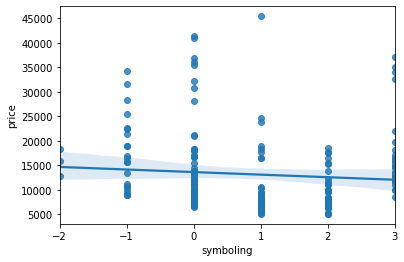

In [42]:
# regression plot of symboling
sns.regplot(x = 'symboling', y = 'price', data = df2)
plt.show()

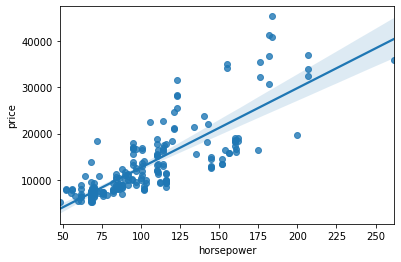

In [43]:
# regression plot of horsepower
sns.regplot(x = 'horsepower', y = 'price', data = df2)
plt.show()

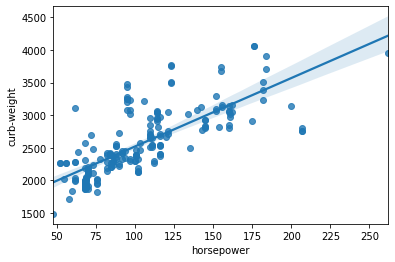

In [44]:
# regression plot of horsepower
sns.regplot(x = 'horsepower', y = 'curb-weight', data = df2)
plt.show()

In [45]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality = [cname for cname in df2.columns if
                    df2[cname].nunique() < 5 and
                    df2[cname].dtype == "object"]
low_cardinality

['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location']

In [46]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
high_cardinality = [cname for cname in df2.columns if
                    df2[cname].nunique() > 5 and
                    df2[cname].dtype == "object"]
high_cardinality

['make', 'engine-type', 'num-of-cylinders', 'fuel-system']

In [47]:
# Let's check one hot encoding all category columns

df2_a = df2.copy()

df2_a = pd.get_dummies(df2_a, columns=category_cols)

print(df2_a.shape)
df2_a.head()

# A total of 75 rows this is too much

(201, 76)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# One-hot encode the make column of dataframe and concat/join to orginal dataframe

df_oh =df2.copy()

for cols in category_cols:
  encoded = pd.get_dummies(df_oh[cols], prefix= cols )
  df_oh = pd.concat([df_oh, encoded], axis=1)

print(df_oh.shape)
df_oh.head()

# With the columns with high dimensionality only we have 104 columns in total (This is too much)

(201, 86)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
df2.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


In [50]:
# Count Encoding of Categorical Variables
#Create the  Count encoder object
df2_ce = df2.copy()
count_enc = ce.CountEncoder()

# Apply the count encoder to dataframe
df2_ce[category_cols ] = count_enc.fit_transform(df2_ce[category_cols])
df2_ce.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,3,181,165,86,68,75,198,94.5,171.2,65.5,52.4,2823,13,24,152,92,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,6,181,165,115,94,118,198,99.8,176.6,66.2,54.3,2337,145,157,109,92,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,6,181,165,115,94,8,198,99.4,176.6,66.4,54.3,2824,145,10,136,92,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,6,181,165,86,94,118,198,99.8,177.3,66.3,53.1,2507,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,6,181,165,115,94,118,198,105.8,192.7,71.4,55.7,2844,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,6,181,165,115,25,118,198,105.8,192.7,71.4,55.7,2954,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,6,181,36,115,94,118,198,105.8,192.7,71.4,55.9,3086,145,10,131,92,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,8,181,165,86,94,75,198,101.2,176.8,64.8,54.3,2395,145,157,108,92,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


In [51]:
df2_ce.shape
df2_ce.to_csv('CountClean.csv')

In [52]:
#  Method 2 : lABEL Encoder
df_le = df2.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le[category_cols]= df_le[category_cols].apply(le.fit_transform)

df_le.to_csv('LableClean.csv')
df_le.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


In [53]:
# drop horsepower-binned column from dataframe
df2_ce.drop(columns = ['horsepower-binned'], inplace= True)

df2_ce.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,3,181,165,86,68,75,198,94.5,171.2,65.5,52.4,2823,13,24,152,92,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,6,181,165,115,94,118,198,99.8,176.6,66.2,54.3,2337,145,157,109,92,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,6,181,165,115,94,8,198,99.4,176.6,66.4,54.3,2824,145,10,136,92,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [54]:
# Using label encoder
df_le.drop(columns = ['horsepower-binned'], inplace= True)
df_le.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [55]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df_le))
zscore


array([[1.72504964, 0.        , 1.97171697, ..., 0.65224901, 0.54228772,
        0.03631396],
       [1.72504964, 0.        , 1.97171697, ..., 0.65224901, 0.54228772,
        0.41538505],
       [0.1271926 , 0.        , 1.97171697, ..., 0.96439676, 0.689386  ,
        0.41538505],
       ...,
       [1.47066444, 0.84595589, 1.39503761, ..., 1.12047063, 1.13068086,
        1.04422678],
       [1.47066444, 0.84595589, 1.39503761, ..., 0.12812034, 0.54228772,
        1.16848137],
       [1.47066444, 0.84595589, 1.39503761, ..., 0.96439676, 0.83648429,
        1.18803412]])

In [56]:
## For simplicity remove all data with outliers
df = df2_a
df = df[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", df2_a.shape)
print("The shape of the clean dataframe is :", df.shape)

deleted_entries = df2_a.shape[0] - df.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (201, 76)
The shape of the clean dataframe is : (154, 76)
Entries deleted in the dataframe are : 47


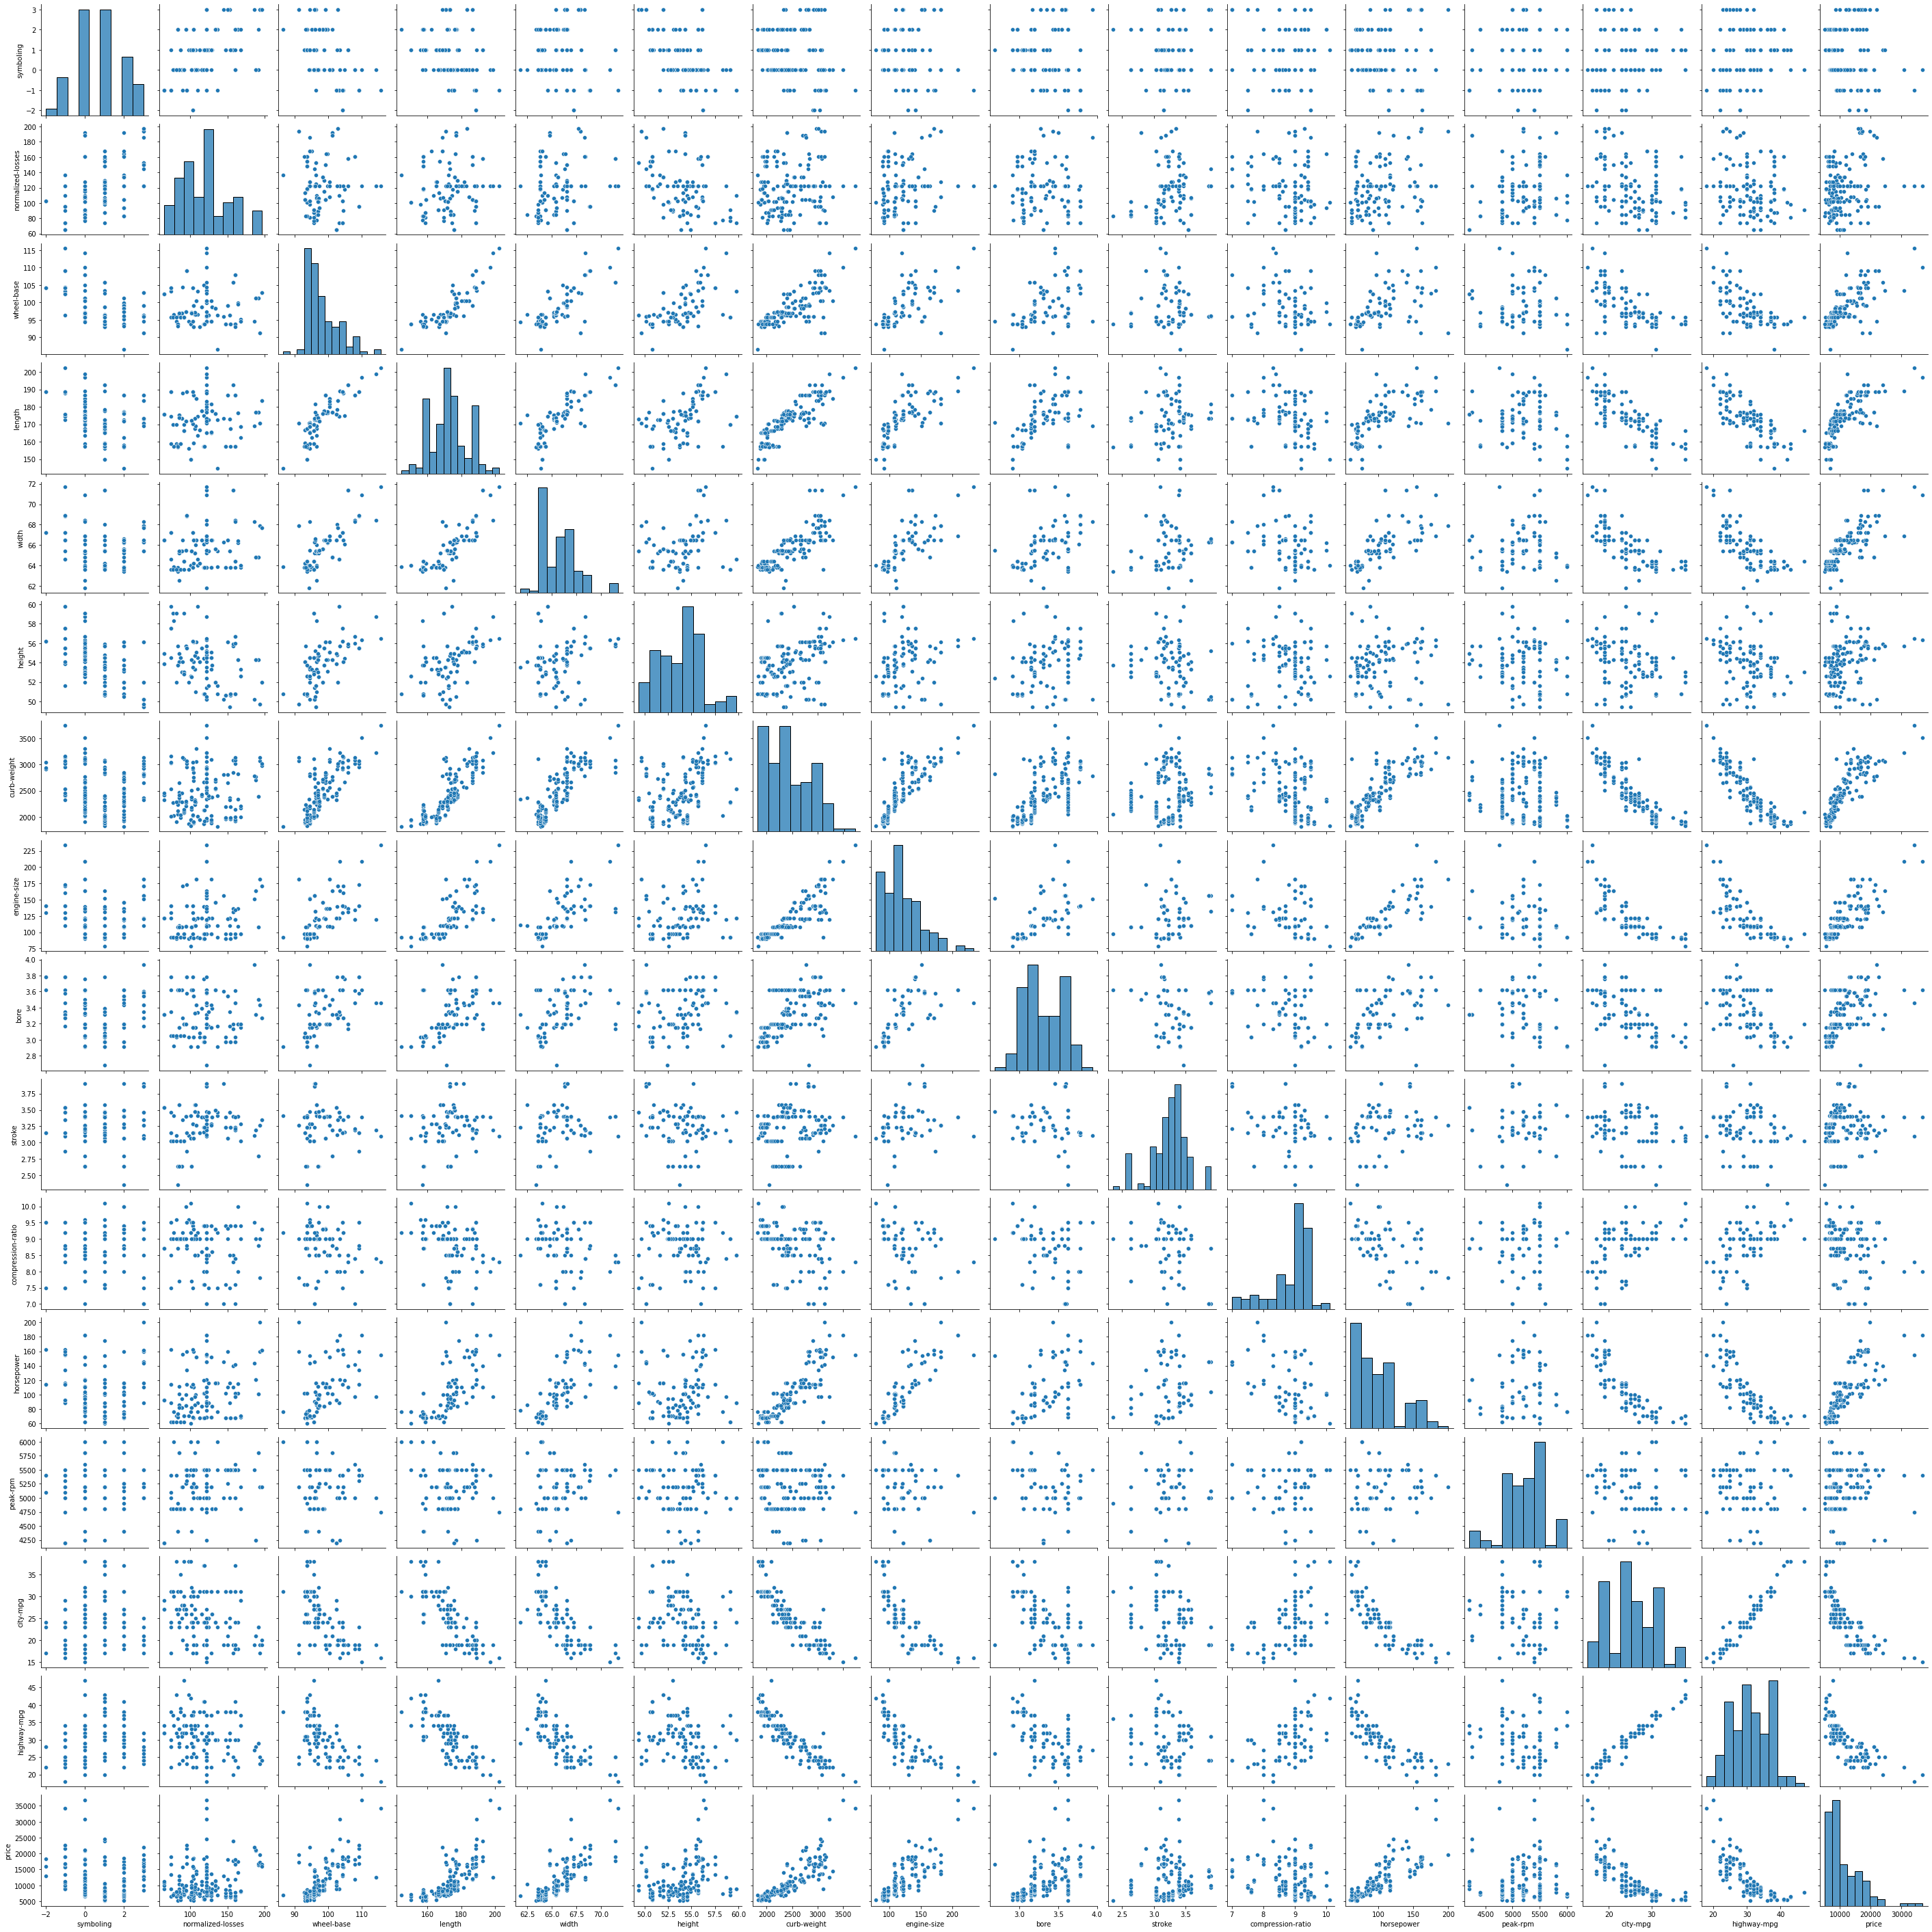

In [57]:
# pairplot on numerical variables
sns.pairplot(df[num_cols])
plt.show()